# **Import Libraries, Data Loading and Initial Inspection**
1. Using guid line from https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)



In [ ]:
pip install ucimlrepo

In [ ]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold,GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,  auc

load dataset

In [ ]:
# fetch dataset
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936)

# data (as pandas dataframes)
X = national_poll_on_healthy_aging_npha.data.features
y = national_poll_on_healthy_aging_npha.data.targets

df = pd.concat([X, y], axis=1)
df

,Age,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender,Number_of_Doctors_Visited
0,2,4,3,3,3,0,0,0,0,1,2,3,1,2,3
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1,2
2,2,3,2,3,3,0,0,0,0,1,3,3,4,1,3
3,2,3,2,3,3,0,0,0,1,0,3,3,4,2,1
4,2,3,3,3,3,1,0,0,0,0,2,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,3,0,0,0,1,0,3,3,1,1,2
710,2,2,2,2,2,1,0,0,0,1,2,3,1,2,3
711,2,4,2,3,3,0,0,0,0,0,3,3,1,1,3
712,2,3,1,3,3,1,0,1,1,1,3,3,1,2,3


In [ ]:
X.head()

,Age,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender
0,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [ ]:
y.head()

,Number_of_Doctors_Visited
0,3
1,2
2,3
3,1
4,3


# **Preprocessing**

Data Info


*   Examine the size
*   Check for missing values
*   ...






In [ ]:
pprint(national_poll_on_healthy_aging_npha.metadata)

{'abstract': 'This is a subset of the NPHA dataset filtered down to develop '
             'and validate machine learning algorithms for predicting the '
             'number of doctors a survey respondent sees in a year. This '
             'dataset’s records represent seniors who responded to the NPHA '
             'survey.\n',
 'additional_info': {'citation': 'Malani, Preeti N., Kullgren, Jeffrey, and '
                                 'Solway, Erica. National Poll on Healthy '
                                 'Aging (NPHA), [United States], April 2017. '
                                 'Inter-university Consortium for Political '
                                 'and Social Research [distributor], '
                                 '2019-05-29. '
                                 'https://doi.org/10.3886/ICPSR37305.v1',
                     'funded_by': 'The dataset was funded by AARP and Michigan '
                                  "Medicine, the University of Michigan's "
      

In [ ]:
pprint(national_poll_on_healthy_aging_npha.variables)

                                          name     role         type  \
0                    Number_of_Doctors_Visited   Target  Categorical   
1                                          Age  Feature  Categorical   
2                              Physical_Health  Feature  Categorical   
3                                Mental_Health  Feature  Categorical   
4                                Dental_Health  Feature  Categorical   
5                                   Employment  Feature  Categorical   
6           Stress_Keeps_Patient_from_Sleeping  Feature  Categorical   
7       Medication_Keeps_Patient_from_Sleeping  Feature  Categorical   
8             Pain_Keeps_Patient_from_Sleeping  Feature  Categorical   
9   Bathroom_Needs_Keeps_Patient_from_Sleeping  Feature  Categorical   
10          Uknown_Keeps_Patient_from_Sleeping  Feature  Categorical   
11                            Trouble_Sleeping  Feature  Categorical   
12               Prescription_Sleep_Medication  Feature  Categor

**Handeling Values -1,-2**




In [ ]:
df_misVaH = df.replace({-1: np.nan, -2: np.nan})
print(df_misVaH.isnull().sum())

Age                                            0
Physical_Health                                1
Mental_Health                                 10
Dental_Health                                  4
Employment                                     0
Stress_Keeps_Patient_from_Sleeping             0
Medication_Keeps_Patient_from_Sleeping         0
Pain_Keeps_Patient_from_Sleeping               0
Bathroom_Needs_Keeps_Patient_from_Sleeping     0
Uknown_Keeps_Patient_from_Sleeping             0
Trouble_Sleeping                               2
Prescription_Sleep_Medication                  3
Race                                           0
Gender                                         0
Number_of_Doctors_Visited                      0
dtype: int64


In [ ]:
df_misVaH['Mental_Health'] = df_misVaH['Mental_Health'].fillna(df_misVaH['Mental_Health'].mode()[0])
print(df_misVaH.isnull().sum())

Age                                           0
Physical_Health                               1
Mental_Health                                 0
Dental_Health                                 4
Employment                                    0
Stress_Keeps_Patient_from_Sleeping            0
Medication_Keeps_Patient_from_Sleeping        0
Pain_Keeps_Patient_from_Sleeping              0
Bathroom_Needs_Keeps_Patient_from_Sleeping    0
Uknown_Keeps_Patient_from_Sleeping            0
Trouble_Sleeping                              2
Prescription_Sleep_Medication                 3
Race                                          0
Gender                                        0
Number_of_Doctors_Visited                     0
dtype: int64


In [ ]:
df_nomiss = df_misVaH.dropna()
print(df_nomiss.isnull().sum())
indices_to_keep = df_nomiss.index

Age                                           0
Physical_Health                               0
Mental_Health                                 0
Dental_Health                                 0
Employment                                    0
Stress_Keeps_Patient_from_Sleeping            0
Medication_Keeps_Patient_from_Sleeping        0
Pain_Keeps_Patient_from_Sleeping              0
Bathroom_Needs_Keeps_Patient_from_Sleeping    0
Uknown_Keeps_Patient_from_Sleeping            0
Trouble_Sleeping                              0
Prescription_Sleep_Medication                 0
Race                                          0
Gender                                        0
Number_of_Doctors_Visited                     0
dtype: int64


**Univariate Analysis**

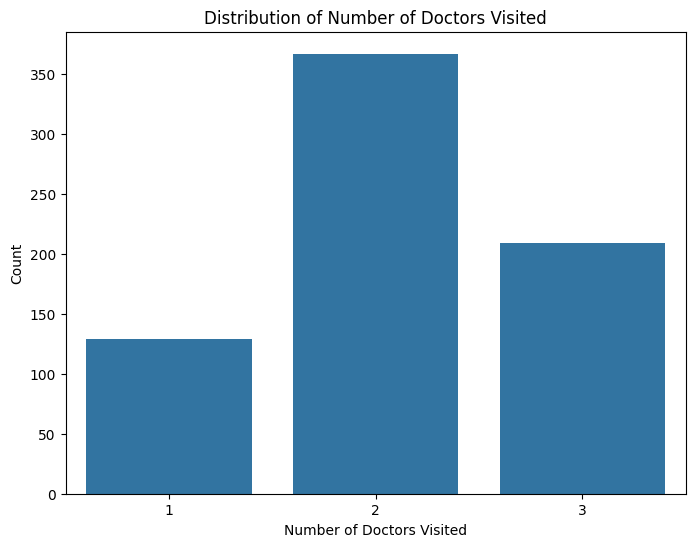

Number_of_Doctors_Visited
2    0.520567
3    0.296454
1    0.182979
Name: proportion, dtype: float64


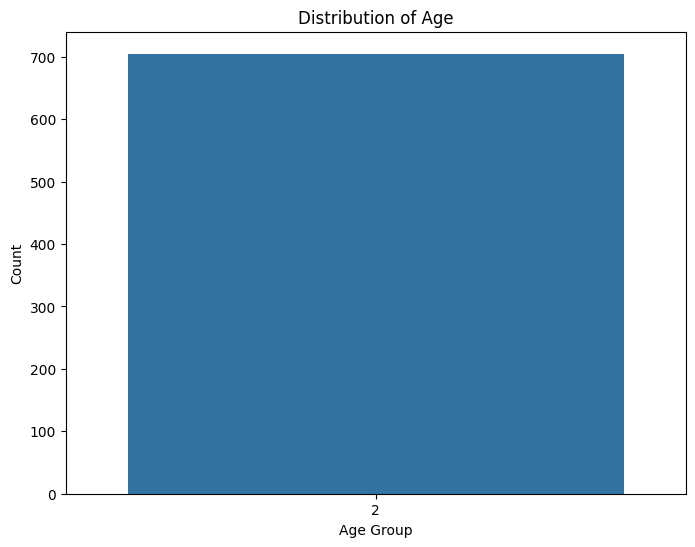

Age
2    1.0
Name: proportion, dtype: float64


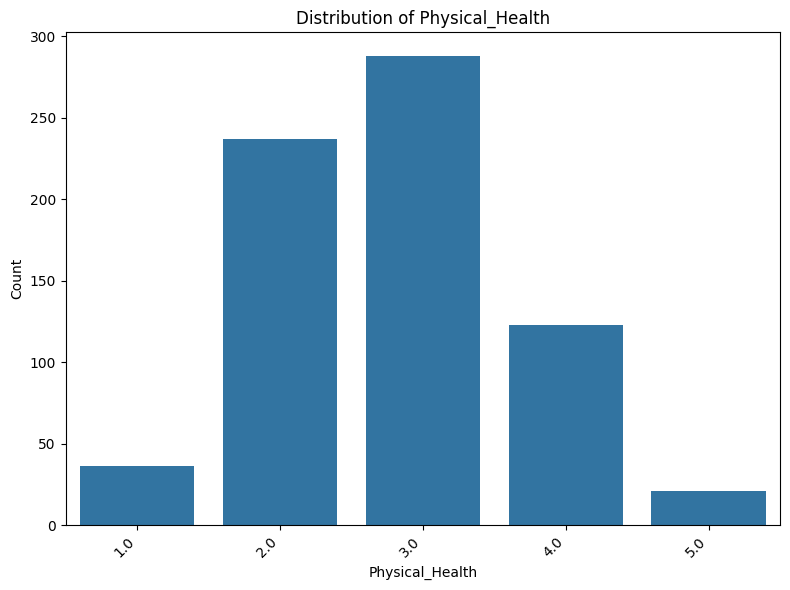

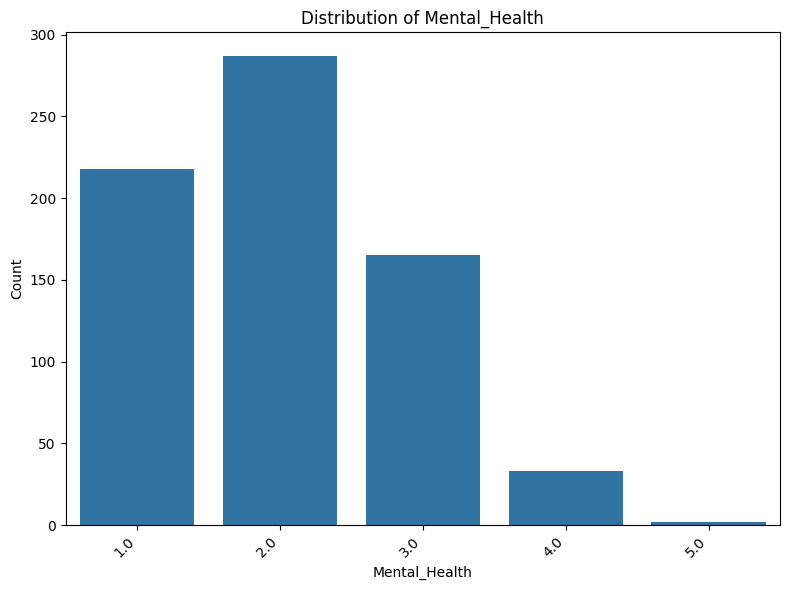

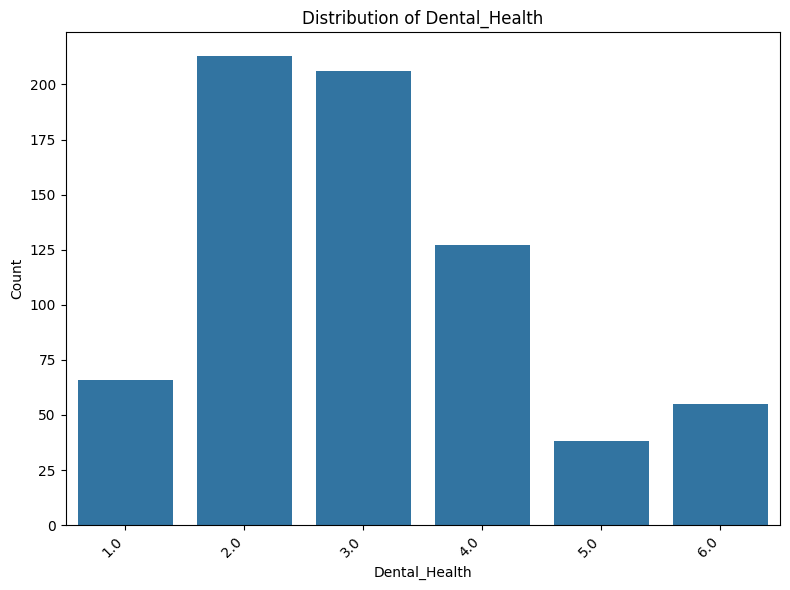

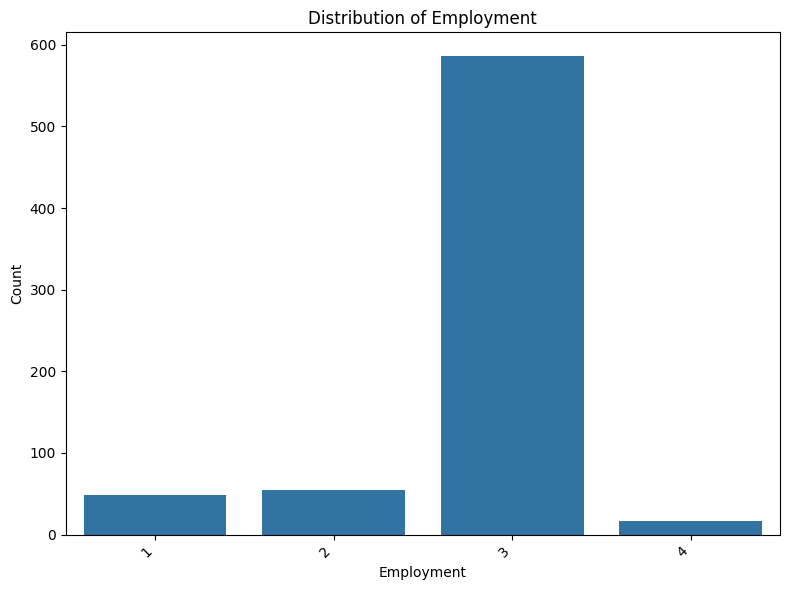

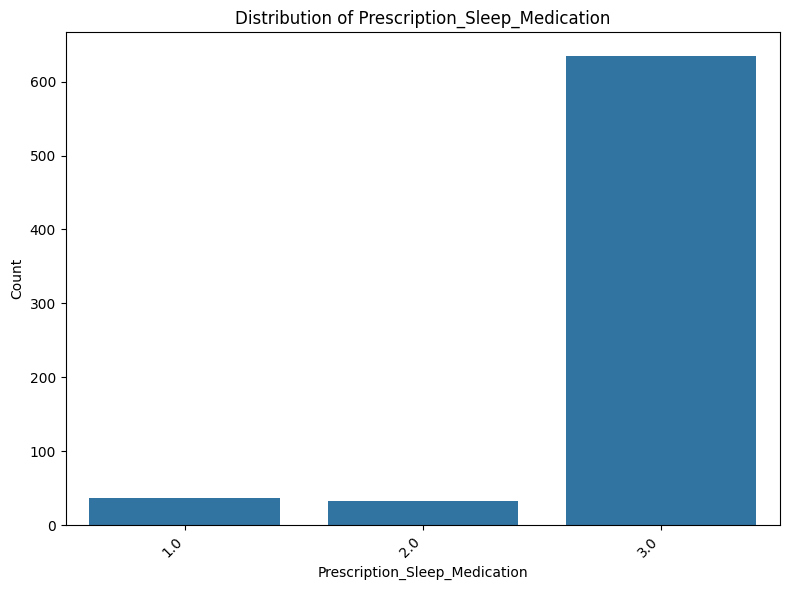

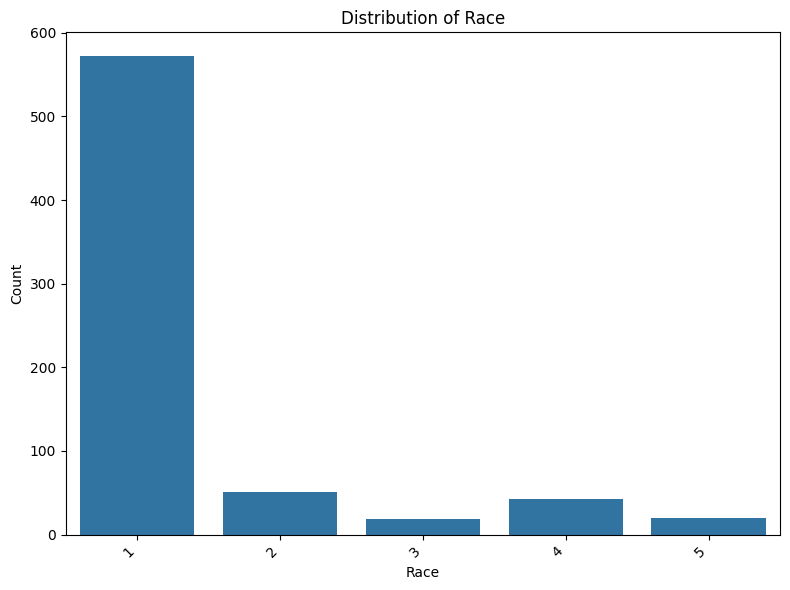

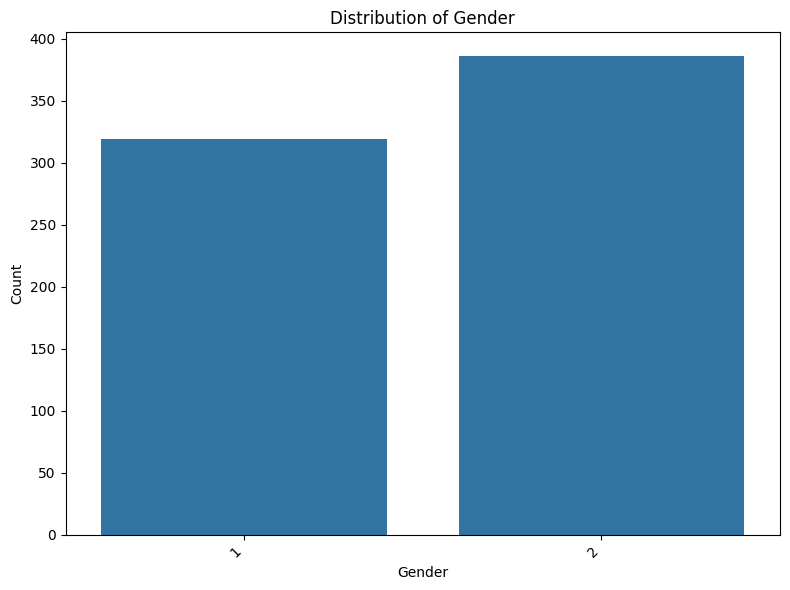

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Number_of_Doctors_Visited', data=df_nomiss)
plt.title('Distribution of Number of Doctors Visited')
plt.xlabel('Number of Doctors Visited')
plt.ylabel('Count')
plt.show()
print(df_nomiss['Number_of_Doctors_Visited'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x='Age', data=df_nomiss)
plt.title('Distribution of Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
print(df_nomiss['Age'].value_counts(normalize=True))


categorical_cols = ['Physical_Health', 'Mental_Health', 'Dental_Health', 'Employment', 'Prescription_Sleep_Medication', 'Race', 'Gender']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_nomiss)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


**Bivariate Analysis**

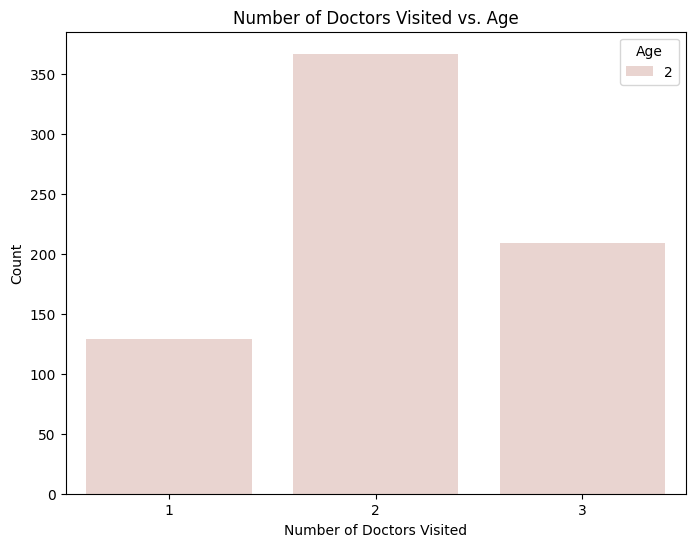

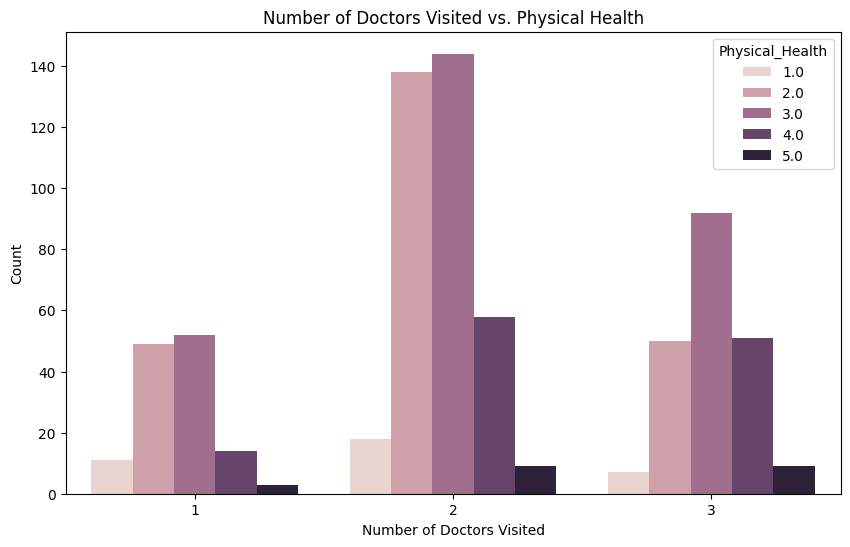

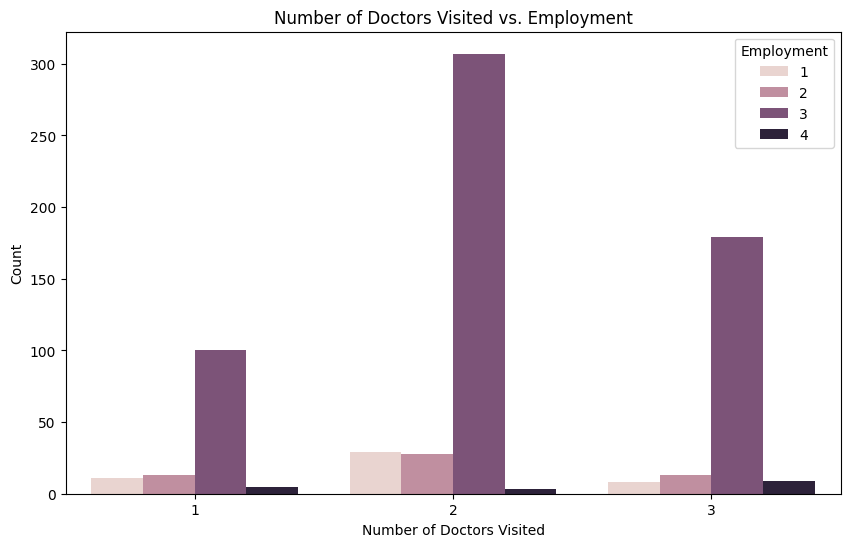

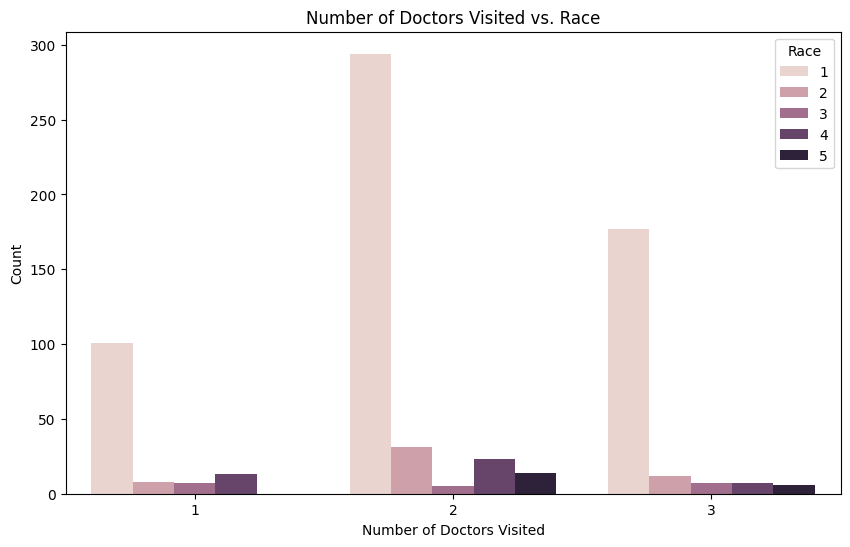

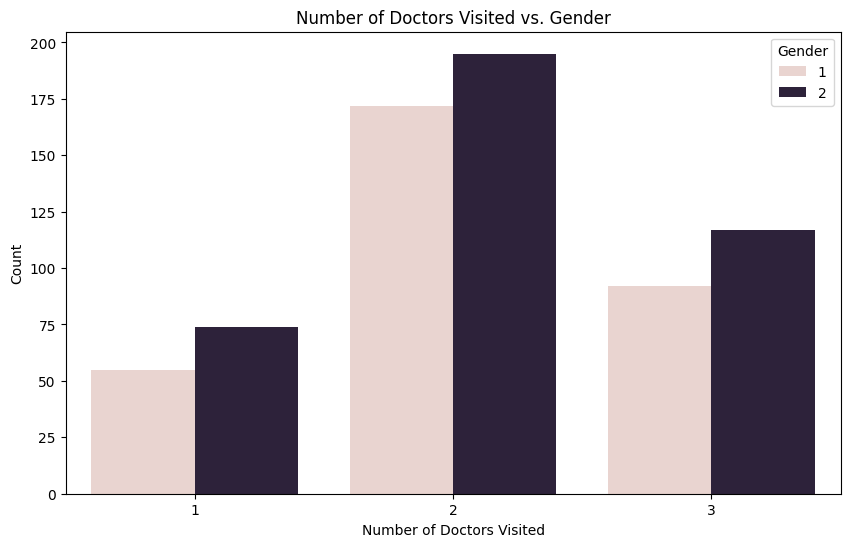

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Number_of_Doctors_Visited', hue='Age', data=df_nomiss)
plt.title('Number of Doctors Visited vs. Age')
plt.xlabel('Number of Doctors Visited')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_Doctors_Visited', hue='Physical_Health', data=df_nomiss)
plt.title('Number of Doctors Visited vs. Physical Health')
plt.xlabel('Number of Doctors Visited')
plt.ylabel('Count')
plt.show()

categorical_cols = ['Employment', 'Race', 'Gender']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Number_of_Doctors_Visited', hue=col, data=df_nomiss)
    plt.title(f'Number of Doctors Visited vs. {col}')
    plt.xlabel('Number of Doctors Visited')
    plt.ylabel('Count')
    plt.show()


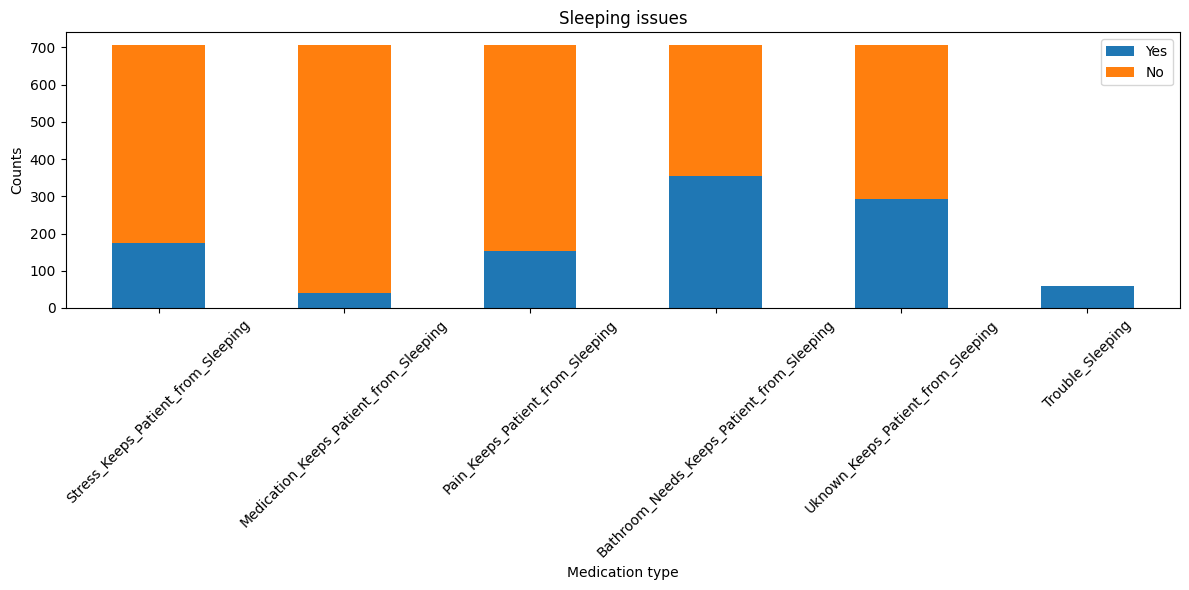

In [ ]:
medication_cols = ['Stress_Keeps_Patient_from_Sleeping',
                   'Medication_Keeps_Patient_from_Sleeping',
                   'Pain_Keeps_Patient_from_Sleeping',
                   'Bathroom_Needs_Keeps_Patient_from_Sleeping',
                   'Uknown_Keeps_Patient_from_Sleeping',
                   'Trouble_Sleeping']

medication_counts = pd.DataFrame()
medication_counts['Yes'] = df_nomiss[medication_cols].apply(lambda x: (x == 1).sum())
medication_counts['No'] = df_nomiss[medication_cols].apply(lambda x: (x == 0).sum())

medication_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sleeping issues')
plt.ylabel('Counts')
plt.xlabel('Medication type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Correlation Analysis**

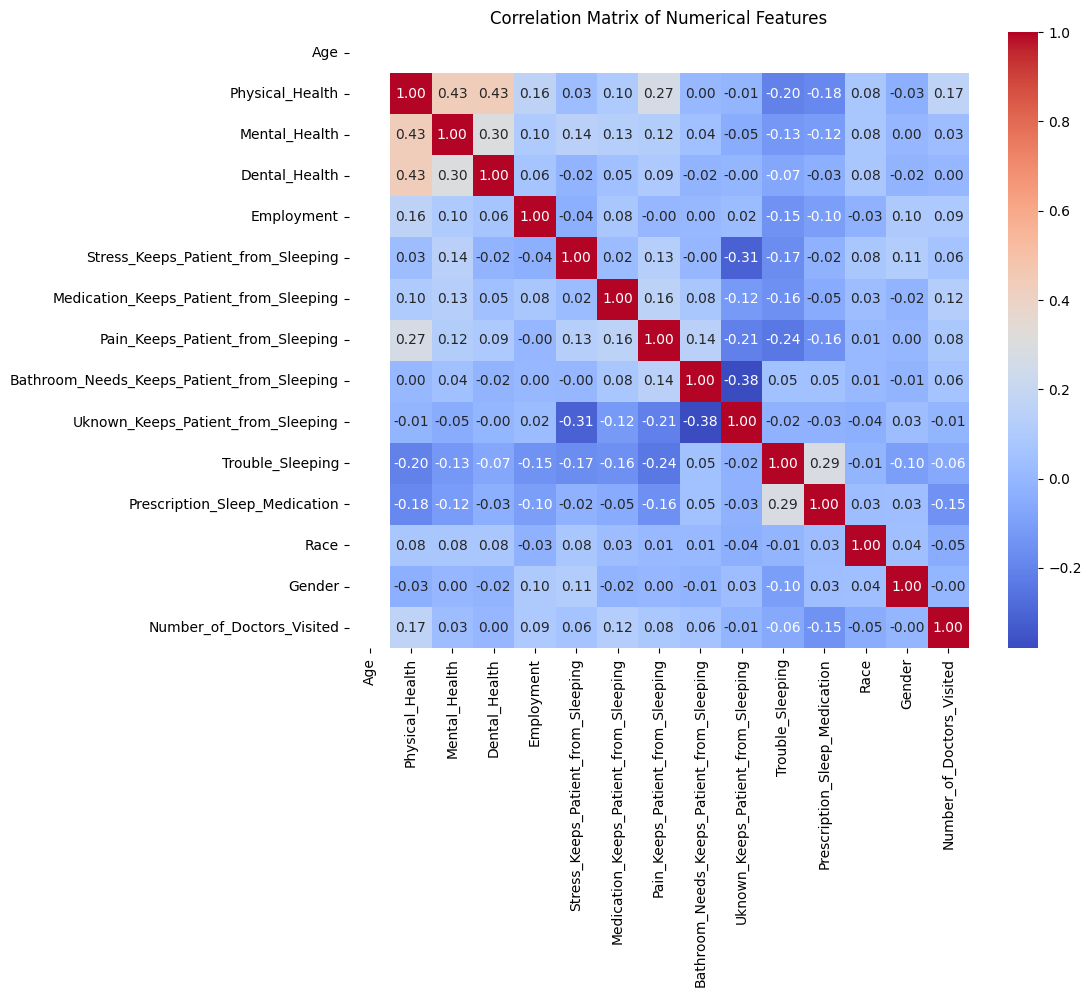

In [ ]:
numeric_data = df_nomiss.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Deleting feature 'Age' (Only has ONE value)**

In [ ]:
df_nomiss_noage = df_nomiss.drop('Age', axis=1)

**Fixing Type**


*  handleing unexpected values
*  convert the type



In [ ]:
ordered_categories = {
    'Physical_Health': [1, 2, 3, 4, 5],
    'Mental_Health': [ 1, 2, 3, 4, 5],
    'Dental_Health': [ 1, 2, 3, 4, 5],
    'Employment': [ 1, 2, 3, 4],
    'Prescription_Sleep_Medication': [1, 2, 3],
    'Number_of_Doctors_Visited':[1,2,3]
}
non_ordered_columns = [
    'Stress_Keeps_Patient_from_Sleeping',
    'Medication_Keeps_Patient_from_Sleeping',
    'Pain_Keeps_Patient_from_Sleeping',
    'Bathroom_Needs_Keeps_Patient_from_Sleeping',
    'Uknown_Keeps_Patient_from_Sleeping',
    'Trouble_Sleeping',
    'Race',
    'Gender'
]


In [ ]:
def check_unexpected_values(df, categories):
    unexpected_values = {}
    for column, valid_values in categories.items():
        if column in df.columns:
            unexpected = df[column][~df[column].isin(valid_values)].unique()
            if unexpected.size > 0:
                unexpected_values[column] = unexpected
    return unexpected_values


unexpected_values = check_unexpected_values(df_nomiss_noage, ordered_categories)

if unexpected_values:
    print("Unexpected values found:")
    for column, values in unexpected_values.items():
        print(f"{column}: {values}")
else:
    print("No unexpected values found.")

Unexpected values found:
Dental_Health: [6.]


In [ ]:
df_nomiss_noage_exp = df_nomiss_noage[df_nomiss_noage['Dental_Health'].isin([1, 2, 3, 4, 5])]

In [ ]:
print(df_nomiss_noage_exp.dtypes)

Physical_Health                               float64
Mental_Health                                 float64
Dental_Health                                 float64
Employment                                      int64
Stress_Keeps_Patient_from_Sleeping              int64
Medication_Keeps_Patient_from_Sleeping          int64
Pain_Keeps_Patient_from_Sleeping                int64
Bathroom_Needs_Keeps_Patient_from_Sleeping      int64
Uknown_Keeps_Patient_from_Sleeping              int64
Trouble_Sleeping                              float64
Prescription_Sleep_Medication                 float64
Race                                            int64
Gender                                          int64
Number_of_Doctors_Visited                       int64
dtype: object


In [ ]:
for column, categories in ordered_categories.items():
    df_nomiss_noage_exp[column] = pd.Categorical(df_nomiss_noage_exp[column], categories=categories, ordered=True)

df_nomiss_noage_exp[non_ordered_columns] = df_nomiss_noage_exp[non_ordered_columns].astype('category')

print("New Data Types after conversion:")
print(df_nomiss_noage_exp.dtypes)

New Data Types after conversion:
Physical_Health                               category
Mental_Health                                 category
Dental_Health                                 category
Employment                                    category
Stress_Keeps_Patient_from_Sleeping            category
Medication_Keeps_Patient_from_Sleeping        category
Pain_Keeps_Patient_from_Sleeping              category
Bathroom_Needs_Keeps_Patient_from_Sleeping    category
Uknown_Keeps_Patient_from_Sleeping            category
Trouble_Sleeping                              category
Prescription_Sleep_Medication                 category
Race                                          category
Gender                                        category
Number_of_Doctors_Visited                     category
dtype: object


<ipython-input-12-82bbe6135572>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomiss_noage_exp[column] = pd.Categorical(df_nomiss_noage_exp[column], categories=categories, ordered=True)
<ipython-input-12-82bbe6135572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomiss_noage_exp[non_ordered_columns] = df_nomiss_noage_exp[non_ordered_columns].astype('category')


In [ ]:
print(df_nomiss_noage_exp[['Physical_Health', 'Mental_Health', 'Dental_Health']].isnull().sum())

Physical_Health    0
Mental_Health      0
Dental_Health      0
dtype: int64


**Encode Categorical Features**

In [ ]:
ordinal_features = list(ordered_categories.keys())
nominal_features = list(non_ordered_columns)

ordinal_encoder = OrdinalEncoder()
df_nomiss_noage_exp.loc[:, ordinal_features] = ordinal_encoder.fit_transform(df_nomiss_noage_exp[ordinal_features])

encoded_A = pd.get_dummies(df_nomiss_noage_exp['Gender'], drop_first=True, prefix='col1')
encoded_B = pd.get_dummies(df_nomiss_noage_exp['Race'], drop_first=False, prefix='col2')
df_encode = pd.concat([df_nomiss_noage_exp.drop(columns=['Gender', 'Race']), encoded_A, encoded_B], axis=1)

<ipython-input-14-d7e2d2d29ae5>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3. 3. 2. 2. 2. 2. 3. 2. 1. 2. 2. 3. 2. 2. 2. 3. 3. 2. 2. 2. 1. 1. 3. 2.
 3. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 3. 3. 2. 1. 2. 2. 1. 2. 3. 1. 1.
 2. 2. 1. 3. 1. 3. 4. 1. 2. 1. 1. 1. 3. 1. 1. 1. 1. 4. 2. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 3. 0. 3. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1.
 3. 2. 2. 1. 1. 3. 2. 3. 1. 0. 1. 1. 1. 1. 1. 0. 3. 2. 2. 2. 2. 2. 3. 3.
 2. 2. 2. 2. 1. 4. 1. 1. 1. 2. 0. 2. 3. 2. 3. 2. 2. 2. 3. 1. 2. 1. 1. 2.
 1. 2. 2. 2. 3. 2. 1. 2. 3. 2. 3. 2. 1. 3. 2. 1. 2. 3. 1. 1. 4. 2. 1. 2.
 4. 2. 3. 1. 2. 3. 2. 1. 1. 1. 2. 3. 4. 1. 0. 0. 1. 3. 2. 1. 1. 1. 1. 4.
 1. 1. 2. 2. 0. 2. 3. 2. 1. 1. 1. 1. 2. 2. 3. 0. 2. 0. 1. 2. 1. 1. 1. 2.
 2. 1. 0. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 0. 3. 2. 2. 2. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 1. 3. 1. 0. 1. 1. 1. 1. 2. 3. 3. 3. 2. 2. 1. 1. 2. 2.
 2. 2. 1. 1. 2. 2. 0. 2. 2. 2. 2. 3. 2. 1. 1

In [ ]:
df_encode

,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Number_of_Doctors_Visited,col1_2,col2_1,col2_2,col2_3,col2_4,col2_5
0,3.0,2.0,2.0,2.0,0,0,0,0,1,2.0,2.0,2.0,True,True,False,False,False,False
1,3.0,1.0,2.0,2.0,1,0,0,1,0,3.0,2.0,1.0,False,True,False,False,False,False
2,2.0,1.0,2.0,2.0,0,0,0,0,1,3.0,2.0,2.0,False,False,False,False,True,False
3,2.0,1.0,2.0,2.0,0,0,0,1,0,3.0,2.0,0.0,True,False,False,False,True,False
4,2.0,2.0,2.0,2.0,1,0,0,0,0,2.0,2.0,2.0,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1.0,1.0,1.0,2.0,0,0,0,1,0,3.0,2.0,1.0,False,True,False,False,False,False
710,1.0,1.0,1.0,1.0,1,0,0,0,1,2.0,2.0,2.0,True,True,False,False,False,False
711,3.0,1.0,2.0,2.0,0,0,0,0,0,3.0,2.0,2.0,False,True,False,False,False,False
712,2.0,0.0,2.0,2.0,1,0,1,1,1,3.0,2.0,2.0,True,True,False,False,False,False


In [ ]:
df_encode.rename(columns={'col1_2': 'Female', 'col2_1': 'White, Non-Hispanic','col2_2':'Black, Non-Hispanic','col2_3':'Other, Non-Hispanic','col2_4':'Hispanic','col2_5':'2+ Races, Non-Hispanic'}, inplace=True)
df_encode

,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Number_of_Doctors_Visited,Female,"White, Non-Hispanic","Black, Non-Hispanic","Other, Non-Hispanic",Hispanic,"2+ Races, Non-Hispanic"
0,3.0,2.0,2.0,2.0,0,0,0,0,1,2.0,2.0,2.0,True,True,False,False,False,False
1,3.0,1.0,2.0,2.0,1,0,0,1,0,3.0,2.0,1.0,False,True,False,False,False,False
2,2.0,1.0,2.0,2.0,0,0,0,0,1,3.0,2.0,2.0,False,False,False,False,True,False
3,2.0,1.0,2.0,2.0,0,0,0,1,0,3.0,2.0,0.0,True,False,False,False,True,False
4,2.0,2.0,2.0,2.0,1,0,0,0,0,2.0,2.0,2.0,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1.0,1.0,1.0,2.0,0,0,0,1,0,3.0,2.0,1.0,False,True,False,False,False,False
710,1.0,1.0,1.0,1.0,1,0,0,0,1,2.0,2.0,2.0,True,True,False,False,False,False
711,3.0,1.0,2.0,2.0,0,0,0,0,0,3.0,2.0,2.0,False,True,False,False,False,False
712,2.0,0.0,2.0,2.0,1,0,1,1,1,3.0,2.0,2.0,True,True,False,False,False,False


Splite

In [ ]:
target_column = 'Number_of_Doctors_Visited'
x_en = df_encode.drop(columns=[target_column])
y_en = df_encode[target_column]
y_en = y_en.values.flatten()

In [ ]:
x_cat = df_nomiss_noage_exp.drop(columns=[target_column])
y_cat = df_nomiss_noage_exp[target_column]
y_cat = y_cat.values.flatten()

**Feature Eng**

In [ ]:
def calculate_composite_health_score(X):
    X['Physical_Health_Norm'] = X['Physical_Health'] / X['Physical_Health'].max() if X['Physical_Health'].max() != 0 else 0
    X['Mental_Health_Norm'] = X['Mental_Health'] / X['Mental_Health'].max() if X['Mental_Health'].max() != 0 else 0
    X['Dental_Health_Norm'] = X['Dental_Health'] / X['Dental_Health'].max() if X['Dental_Health'].max() != 0 else 0
    X['Overall_Health'] = X['Physical_Health_Norm'] + X['Mental_Health_Norm'] + X['Dental_Health_Norm']
    X = X.drop(['Physical_Health_Norm', 'Mental_Health_Norm', 'Dental_Health_Norm'], axis=1)
    X = X.drop(['Physical_Health', 'Mental_Health', 'Dental_Health'], axis=1)
    return X

In [ ]:
X_cat_combhea = calculate_composite_health_score(x_cat)
X_cat_combhea

,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender,Overall_Health
0,2.0,0,0,0,0,1,2.0,2.0,1,2,1.75
1,2.0,1,0,0,1,0,3.0,2.0,1,1,1.50
2,2.0,0,0,0,0,1,3.0,2.0,4,1,1.25
3,2.0,0,0,0,1,0,3.0,2.0,4,2,1.25
4,2.0,1,0,0,0,0,2.0,2.0,1,2,1.50
...,...,...,...,...,...,...,...,...,...,...,...
709,2.0,0,0,0,1,0,3.0,2.0,1,1,0.75
710,1.0,1,0,0,0,1,2.0,2.0,1,2,0.75
711,2.0,0,0,0,0,0,3.0,2.0,1,1,1.50
712,2.0,1,0,1,1,1,3.0,2.0,1,2,1.00


In [ ]:
X_en_combhea = calculate_composite_health_score(x_en)
X_en_combhea

,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Female,"White, Non-Hispanic","Black, Non-Hispanic","Other, Non-Hispanic",Hispanic,"2+ Races, Non-Hispanic",Overall_Health
0,2.0,0,0,0,0,1,2.0,2.0,True,True,False,False,False,False,1.75
1,2.0,1,0,0,1,0,3.0,2.0,False,True,False,False,False,False,1.50
2,2.0,0,0,0,0,1,3.0,2.0,False,False,False,False,True,False,1.25
3,2.0,0,0,0,1,0,3.0,2.0,True,False,False,False,True,False,1.25
4,2.0,1,0,0,0,0,2.0,2.0,True,True,False,False,False,False,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2.0,0,0,0,1,0,3.0,2.0,False,True,False,False,False,False,0.75
710,1.0,1,0,0,0,1,2.0,2.0,True,True,False,False,False,False,0.75
711,2.0,0,0,0,0,0,3.0,2.0,False,True,False,False,False,False,1.50
712,2.0,1,0,1,1,1,3.0,2.0,True,True,False,False,False,False,1.00


In [ ]:
def calculate_sleep_disturbance(X):
    sleep_cols = [
        'Stress_Keeps_Patient_from_Sleeping',
        'Medication_Keeps_Patient_from_Sleeping',
        'Pain_Keeps_Patient_from_Sleeping',
        'Bathroom_Needs_Keeps_Patient_from_Sleeping',
        'Uknown_Keeps_Patient_from_Sleeping'
    ]

    X[sleep_cols] = X[sleep_cols].apply(pd.to_numeric, errors='coerce')
    X['Sleep_Disturbance'] = X[sleep_cols].sum(axis=1)
    X = X.drop(['Stress_Keeps_Patient_from_Sleeping', 'Medication_Keeps_Patient_from_Sleeping', 'Pain_Keeps_Patient_from_Sleeping','Bathroom_Needs_Keeps_Patient_from_Sleeping','Uknown_Keeps_Patient_from_Sleeping'], axis=1)
    return X


In [ ]:
X_with_sleep_disturbance_cat = calculate_sleep_disturbance(X_cat_combhea)
X_with_sleep_disturbance_cat

,Employment,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender,Overall_Health,Sleep_Disturbance
0,2.0,2.0,2.0,1,2,1.75,1
1,2.0,3.0,2.0,1,1,1.50,2
2,2.0,3.0,2.0,4,1,1.25,1
3,2.0,3.0,2.0,4,2,1.25,1
4,2.0,2.0,2.0,1,2,1.50,1
...,...,...,...,...,...,...,...
709,2.0,3.0,2.0,1,1,0.75,1
710,1.0,2.0,2.0,1,2,0.75,2
711,2.0,3.0,2.0,1,1,1.50,0
712,2.0,3.0,2.0,1,2,1.00,4


In [ ]:
X_with_sleep_disturbance_en = calculate_sleep_disturbance(X_en_combhea)
X_with_sleep_disturbance_en

,Employment,Trouble_Sleeping,Prescription_Sleep_Medication,Female,"White, Non-Hispanic","Black, Non-Hispanic","Other, Non-Hispanic",Hispanic,"2+ Races, Non-Hispanic",Overall_Health,Sleep_Disturbance
0,2.0,2.0,2.0,True,True,False,False,False,False,1.75,1
1,2.0,3.0,2.0,False,True,False,False,False,False,1.50,2
2,2.0,3.0,2.0,False,False,False,False,True,False,1.25,1
3,2.0,3.0,2.0,True,False,False,False,True,False,1.25,1
4,2.0,2.0,2.0,True,True,False,False,False,False,1.50,1
...,...,...,...,...,...,...,...,...,...,...,...
709,2.0,3.0,2.0,False,True,False,False,False,False,0.75,1
710,1.0,2.0,2.0,True,True,False,False,False,False,0.75,2
711,2.0,3.0,2.0,False,True,False,False,False,False,1.50,0
712,2.0,3.0,2.0,True,True,False,False,False,False,1.00,4


**splite train\test**

In [ ]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_with_sleep_disturbance_cat, y_cat, test_size=0.2, random_state=42,stratify = y_cat)
X_train, X_test, y_train, y_test = train_test_split(
    X_with_sleep_disturbance_en, y_en, test_size=0.2, random_state=42, stratify = y_en)

# **Machine learning algorithms**

In [ ]:
subset_size_cat = int(0.2 * len(X_with_sleep_disturbance_cat))
X_subset_cat, y_subset_cat = X_with_sleep_disturbance_cat[:subset_size_cat], y_cat[:subset_size_cat]
subset_size = int(0.2 * len(X_with_sleep_disturbance_en))
X_subset, y_subset = X_with_sleep_disturbance_en[:subset_size], y_en[:subset_size]

SVM

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'gamma': ['scale', 'auto']+ [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

In [ ]:
grid_search.fit(X_subset, y_subset)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_macro')

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model_svm_first = grid_search.best_estimator_
joblib.dump(best_model_svm_first, 'best_model_svm_first.pkl')

Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'poly'}


['best_model_svm_first.pkl']

In [ ]:
best_model_svm_first = joblib.load('best_model_svm_first.pkl')
if best_model_svm_first.kernel == 'poly':

    param_grid = {
        'degree': [2, 3, 4, 5, 6],
        'coef0': [0, 0.1, 1, 10]
    }

    model_svm = SVC(kernel='poly', C=best_model_svm_first.C, gamma=best_model_svm_first.gamma, class_weight=best_model_svm_first.class_weight )

    grid_search_svm2 = GridSearchCV(model_svm, param_grid, cv=5)
    grid_search_svm2.fit(X_subset, y_subset)
    best_model_svm_second = grid_search.best_estimator_
    joblib.dump(best_model_svm_second, 'best_model_svm_second.pkl')
    print("Best parameters found: ", grid_search.best_params_)
else:
    print("The kernel of the best model is not 'poly'. No further tuning is performed.")

Best parameters found:  {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'poly'}


**Naive Bayse**

In [ ]:
param_grid_naive = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}
grid_search_naive = GridSearchCV(MultinomialNB(), param_grid_naive, cv=5)

In [ ]:
grid_search_naive.fit(X_subset_cat, y_subset_cat)
print("Best parameters found: ", grid_search_naive.best_params_)
best_model_naive_first = grid_search_naive.best_estimator_
joblib.dump(best_model_naive_first, 'best_model_naive_first.pkl')

Best parameters found:  {'alpha': 0.1, 'fit_prior': True}


['best_model_naive_first.pkl']

**Logistic Regression**

In [ ]:
model_logistic = LogisticRegression(max_iter = 4000)
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs','sag', 'saga', 'liblinear'],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced'],
}
grid_search_logistic = GridSearchCV(model_logistic, param_grid_logistic, cv=5, n_jobs=-1)

In [ ]:
grid_search_logistic.fit(X_subset, y_subset)
print("Best parameters found: ", grid_search_logistic.best_params_)
best_model_logistic_first = grid_search_logistic.best_estimator_
joblib.dump(best_model_logistic_first, 'best_model_logistic_first.pkl')

Best parameters found:  {'C': 1, 'class_weight': None, 'solver': 'lbfgs', 'tol': 0.01}


['best_model_logistic_first.pkl']

**Test and Compaire**

In [ ]:
loaded_model_svm_first = joblib.load('best_model_svm_second.pkl')
loaded_model_naive_first = joblib.load('best_model_naive_first.pkl')
loaded_model_logistic_first = joblib.load('best_model_logistic_first.pkl')

In [ ]:
models = {
    "SVM": loaded_model_svm_first,
    "Naive Bayes": loaded_model_naive_first,
    "Logistic Regression": loaded_model_logistic_first,
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score
}

datasets = {
    "SVM": (X_train, X_test, y_train, y_test),
    "Naive Bayes": (X_train_cat, X_test_cat, y_train_cat, y_test_cat),
    "Logistic Regression": (X_train, X_test, y_train, y_test)
}

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize


kf = KFold(n_splits=5, shuffle=True, random_state=42)


results = {model_name: {metric: [] for metric in metrics} for model_name in models}
roc_curves = {model_name: {'fpr': [], 'tpr': [], 'auc': []} for model_name in models}


for model_name, model in models.items():
    print(f"Evaluating {model_name}...")


    X_train_model, X_test_model, y_train_model, y_test_model = datasets[model_name]
    X_model = np.concatenate((X_train_model, X_test_model))
    y_model = np.concatenate((y_train_model, y_test_model))


    y_true_all = []
    y_pred_proba_all = []

    for train_index, test_index in kf.split(X_model):
        X_train_fold, X_test_fold = X_model[train_index], X_model[test_index]
        y_train_fold, y_test_fold = y_model[train_index], y_model[test_index]


        model.fit(X_train_fold, y_train_fold)


        y_pred = model.predict(X_test_fold)

        y_true_all.extend(y_test_fold)
        if hasattr(model, "predict_proba"):
            y_pred_proba_all.extend(model.predict_proba(X_test_fold))

        for metric_name, metric_func in metrics.items():
            if metric_name == 'Accuracy':
                score = metric_func(y_test_fold, y_pred)
            else:
                score = metric_func(y_test_fold, y_pred, average='weighted', zero_division=0)
            results[model_name][metric_name].append(score)


    if hasattr(model, "predict_proba"):
        y_true_all_binarized = label_binarize(y_true_all, classes=np.unique(y_model))
        y_pred_proba_all = np.array(y_pred_proba_all)


        for i in range(y_true_all_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_true_all_binarized[:, i], y_pred_proba_all[:, i])
            roc_auc = auc(fpr, tpr)
            roc_curves[model_name]['fpr'].append(fpr)
            roc_curves[model_name]['tpr'].append(tpr)
            roc_curves[model_name]['auc'].append(roc_auc)
    else:
        print(f"{model_name} does not support predict_proba. Skipping ROC curve.")


Evaluating SVM...
SVM does not support predict_proba. Skipping ROC curve.
Evaluating Naive Bayes...
Evaluating Logistic Regression...


In [ ]:
for model_name, metric_scores in results.items():
    print(f"\n{model_name} Performance:")
    for metric_name, scores in metric_scores.items():
        print(f"{metric_name}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")


SVM Performance:
Accuracy: Mean = 0.5077, Std = 0.0323
Precision: Mean = 0.4390, Std = 0.0588
Recall: Mean = 0.5077, Std = 0.0323
F1-Score: Mean = 0.4168, Std = 0.0502

Naive Bayes Performance:
Accuracy: Mean = 0.5292, Std = 0.0393
Precision: Mean = 0.3868, Std = 0.1618
Recall: Mean = 0.5292, Std = 0.0393
F1-Score: Mean = 0.3703, Std = 0.0482

Logistic Regression Performance:
Accuracy: Mean = 0.5138, Std = 0.0305
Precision: Mean = 0.4296, Std = 0.0451
Recall: Mean = 0.5138, Std = 0.0305
F1-Score: Mean = 0.4097, Std = 0.0445


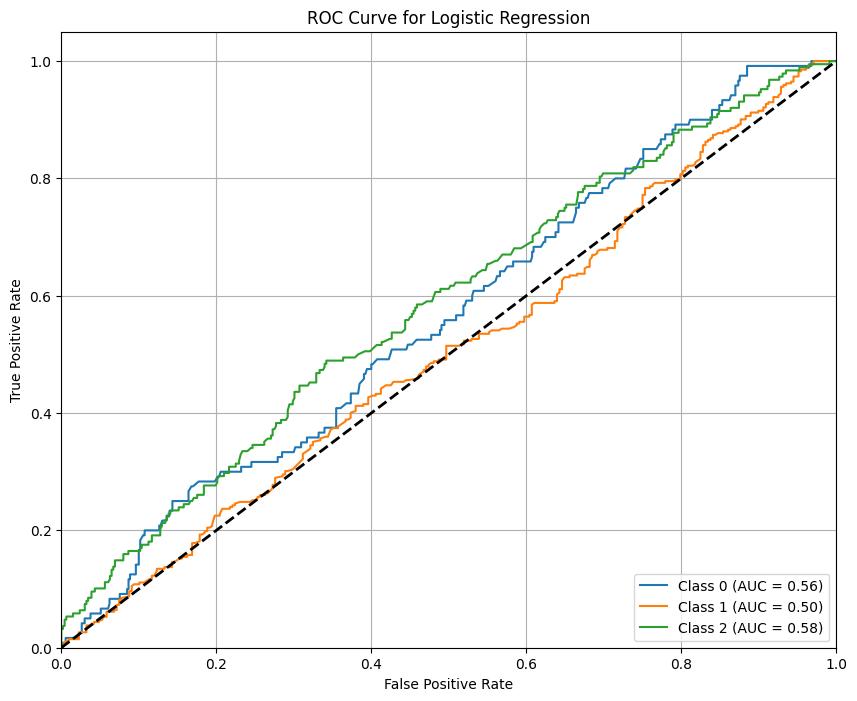

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(len(roc_curves[model_name]['fpr'])):
    plt.plot(roc_curves[model_name]['fpr'][i],
             roc_curves[model_name]['tpr'][i],
             label=f'Class {i} (AUC = {roc_curves[model_name]["auc"][i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc='lower right')
plt.grid()

plt.show()

best desicion tree

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 30}
Best Cross-Validation Score: 0.4865678913914911

Test Accuracy: 0.46923076923076923

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.21      0.12      0.16        24
         1.0       0.52      0.74      0.61        68
         2.0       0.42      0.21      0.28        38

    accuracy                           0.47       130
   macro avg       0.38      0.36      0.35       130
weighted avg       0.43      0.47      0.43       130


Train Accuracy: 0.6096153846153847

Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.45      0.21      0.29        96
         1.0       0.62      0.86      0.72       274
         2.0       0.64      0.41      0.50       150

    accuracy                           0.61       520
   macro avg       0.57      0.49      0.50    

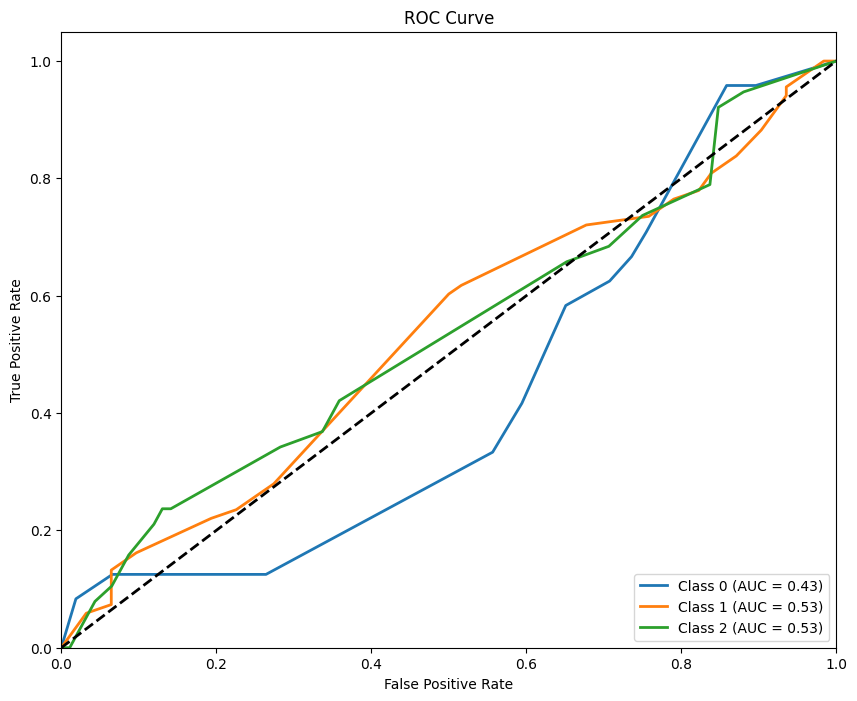

In [ ]:
#DESICION TREE, SFM, StratifiedKFold, GRIDSEARCH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

dt = DecisionTreeClassifier(random_state=42)


dt.fit(X_train, y_train)
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]


sfm = SelectFromModel(dt, threshold="mean", max_features=10)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

pca = PCA(n_components=5)
X_train_selected = pca.fit_transform(X_train_selected)
X_test_selected = pca.transform(X_test_selected)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': [2, 5, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


y_pred_test = grid_search.best_estimator_.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

y_pred_train = grid_search.best_estimator_.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("\nTrain Accuracy:", train_accuracy)
print("\nClassification Report (Train Data):")
print(classification_report(y_train, y_pred_train))


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], grid_search.best_estimator_.predict_proba(X_test_selected)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Selected Features: ['Employment', 'Trouble_Sleeping', 'Prescription_Sleep_Medication', 'Female', 'White, Non-Hispanic', 'Black, Non-Hispanic', 'Other, Non-Hispanic', 'Hispanic', '2+ Races, Non-Hispanic', 'Sleep_Disturbance']

=== Decision Tree Hyperparameters ===
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best
=== Cross-Validation Results ===
Train CV Accuracy: 0.6582
Test CV Accuracy: 0.4692
=== Train Data Report ===
              precision    recall  f1-score   support

         0.0       0.78      0.33      0.47        96
         1.0       0.61      0.97      0.75       274
         2.0       0.95      0.25      0.40       150

    accuracy                           0.65       520
   macro avg       0.78      0.52      0.54       520
weighted avg       0.74      0.65      0.60 

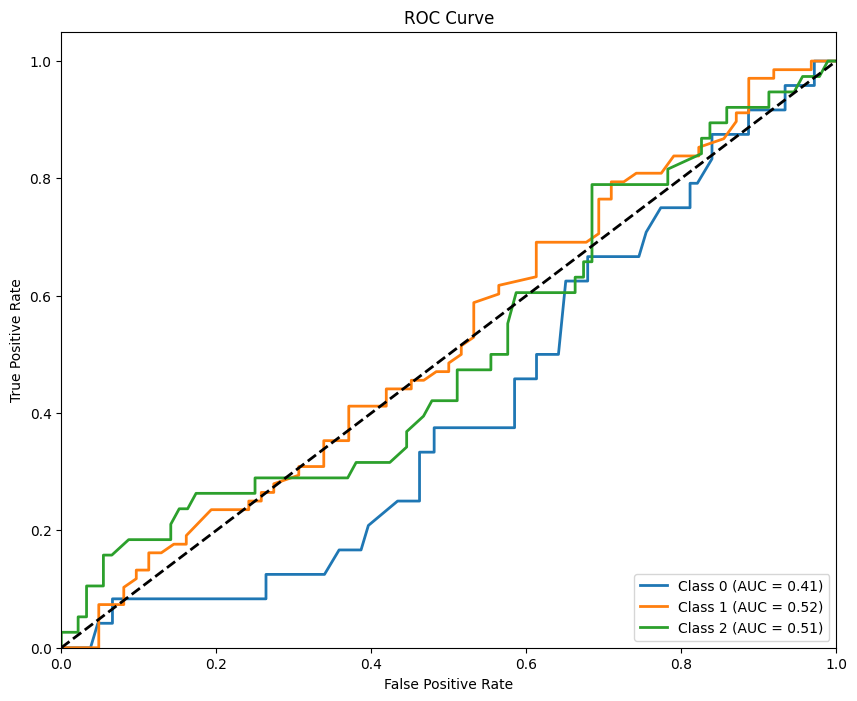

In [ ]:
#VERSION2 DESICION TREE, SFS, CROSSVALIDATION
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

dt_model = DecisionTreeClassifier(random_state=42)

sfs = SFS(estimator=dt_model, n_features_to_select=10, direction='forward', cv=5)
sfs.fit(X_train, y_train)

selected_features = X_train.columns[sfs.get_support()]
print("Selected Features:", list(selected_features))

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

cv_results = cross_validate(dt_model, X_train_sfs, y_train, cv=5, scoring='accuracy', return_train_score=True)

print("\n=== Decision Tree Hyperparameters ===")
for param, value in dt_model.get_params().items():
    print(f"{param}: {value}")

print("=== Cross-Validation Results ===")
print(f"Train CV Accuracy: {np.mean(cv_results['train_score']):.4f}")
print(f"Test CV Accuracy: {np.mean(cv_results['test_score']):.4f}")

dt_model.fit(X_train_sfs, y_train)
y_train_pred = dt_model.predict(X_train_sfs)
y_test_pred = dt_model.predict(X_test_sfs)

print("=== Train Data Report ===")
print(classification_report(y_train, y_train_pred))
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Train Precision: {precision_score(y_train, y_train_pred, average='weighted'):.4f}")
print(f"Train Recall: {recall_score(y_train, y_train_pred, average='weighted'):.4f}")
print(f"Train F1-Score: {f1_score(y_train, y_train_pred, average='weighted'):.4f}")

print("=== Test Data Report ===")
print(classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Test F1-Score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], grid_search.best_estimator_.predict_proba(X_test_selected)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



best knn

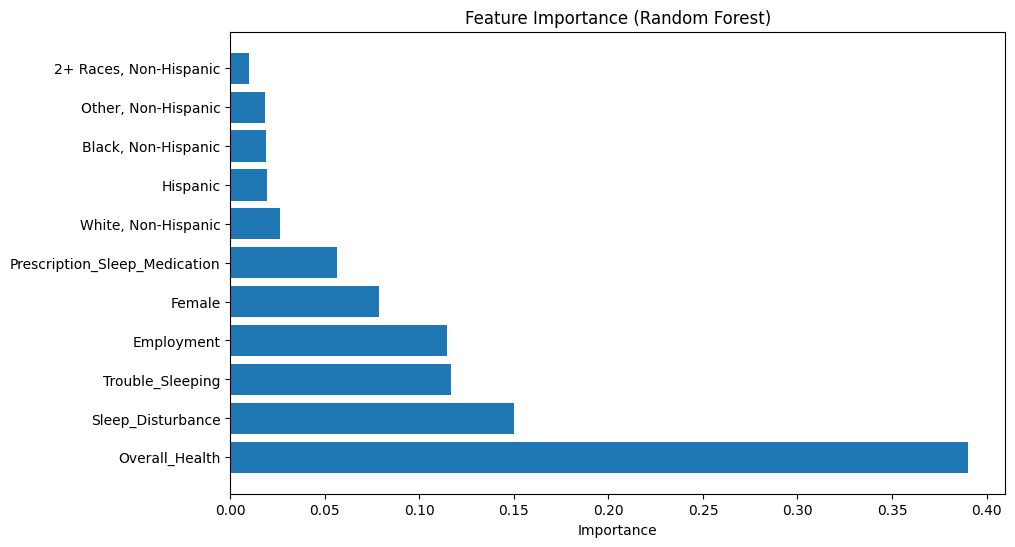

Selected Features based on RandomForest Feature Importance: Index(['Overall_Health', 'Sleep_Disturbance', 'Trouble_Sleeping', 'Employment',
       'Female', 'Prescription_Sleep_Medication', 'White, Non-Hispanic',
       'Hispanic', 'Black, Non-Hispanic', 'Other, Non-Hispanic'],
      dtype='object')


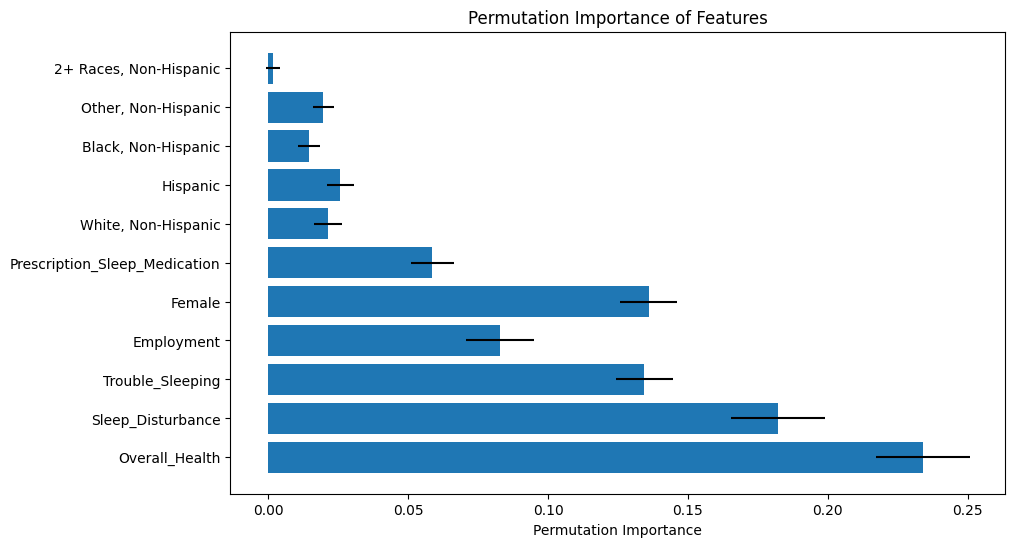

Selected Features based on Permutation Importance: Index(['Overall_Health', 'Sleep_Disturbance', 'Trouble_Sleeping', 'Employment',
       'Female', 'Prescription_Sleep_Medication', 'White, Non-Hispanic',
       'Hispanic', 'Black, Non-Hispanic', 'Other, Non-Hispanic',
       '2+ Races, Non-Hispanic'],
      dtype='object')
Final Selected Features: ['Prescription_Sleep_Medication', 'Employment', 'Trouble_Sleeping', 'White, Non-Hispanic', 'Overall_Health', 'Sleep_Disturbance', 'Hispanic', 'Other, Non-Hispanic', 'Female', 'Black, Non-Hispanic']
K-Fold Cross Validation Scores: [0.44230769 0.52884615 0.53846154 0.46153846 0.43269231]
Average Cross Validation Accuracy: 0.48076923076923084
Best Hyperparameters from GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.47      0.15      0.22        96
         1.0       0.59      0.89      0.71       274
     

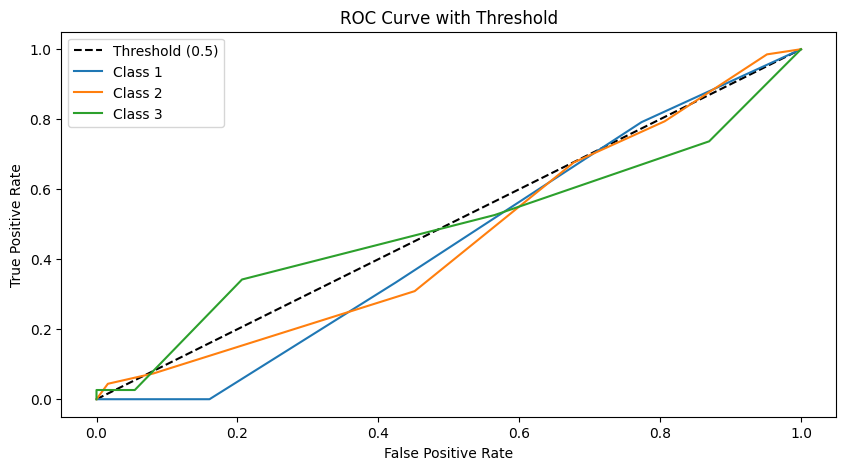

In [ ]:
#knn,
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer


# # Handling missing values with KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)
# X_train_imputed = knn_imputer.fit_transform(X_train)
# X_test_imputed = knn_imputer.transform(X_test)

# # Convert back to DataFrame after imputation and restore column names
# X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
# X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)
# # RandomForestClassifier for feature importance

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Importance")
plt.show()


selected_features = X_train.columns[indices][:10]
print("Selected Features based on RandomForest Feature Importance:", selected_features)


results = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=42)


plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), results.importances_mean[indices], xerr=results.importances_std[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.show()

selected_features_perm = X_train.columns[indices][results.importances_mean[indices] > 0]
print("Selected Features based on Permutation Importance:", selected_features_perm)


selected_features_final = list(set(selected_features) & set(selected_features_perm))
print("Final Selected Features:", selected_features_final)


X_train_selected = X_train[selected_features_final]
X_test_selected = X_test[selected_features_final]


knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)


best_knn = grid_search.best_estimator_


cv_scores = cross_val_score(best_knn, X_train_selected, y_train, cv=5, scoring='accuracy')


y_train_pred = best_knn.predict(X_train_selected)
y_test_pred = best_knn.predict(X_test_selected)
y_scores = best_knn.predict_proba(X_test_selected)

print("K-Fold Cross Validation Scores:", cv_scores)
print("Average Cross Validation Accuracy:", cv_scores.mean())
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)


print("Classification Report (Train Data):")
print(classification_report(y_train, y_train_pred))
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Train Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Train F1-Score:", f1_score(y_train, y_train_pred, average='weighted'))

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Test Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("Test F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(10, 5))
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Threshold (0.5)')


for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Threshold")
plt.legend()
plt.show()

best random forest

Selected Features: Index(['Employment', 'Trouble_Sleeping', 'Prescription_Sleep_Medication',
       'Female', 'White, Non-Hispanic', 'Black, Non-Hispanic',
       'Other, Non-Hispanic', 'Hispanic', 'Overall_Health',
       'Sleep_Disturbance'],
      dtype='object')

Classification Report (Train Data - After RFE):
              precision    recall  f1-score   support

         0.0       0.89      0.26      0.40        96
         1.0       0.67      0.95      0.78       274
         2.0       0.77      0.53      0.63       150

    accuracy                           0.70       520
   macro avg       0.78      0.58      0.60       520
weighted avg       0.74      0.70      0.67       520


Classification Report (Test Data - After RFE):
              precision    recall  f1-score   support

         0.0       0.11      0.04      0.06        24
         1.0       0.52      0.81      0.63        68
         2.0       0.40      0.16      0.23        38

    accuracy                         

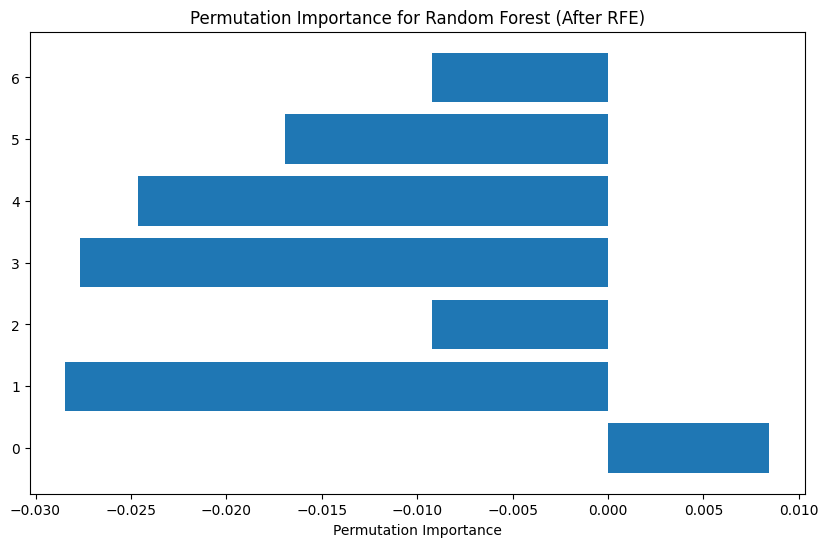


Most important features (After RFE):
Principal Component 4
Principal Component 6
Principal Component 3
Principal Component 2
Principal Component 5
Principal Component 7
Principal Component 1


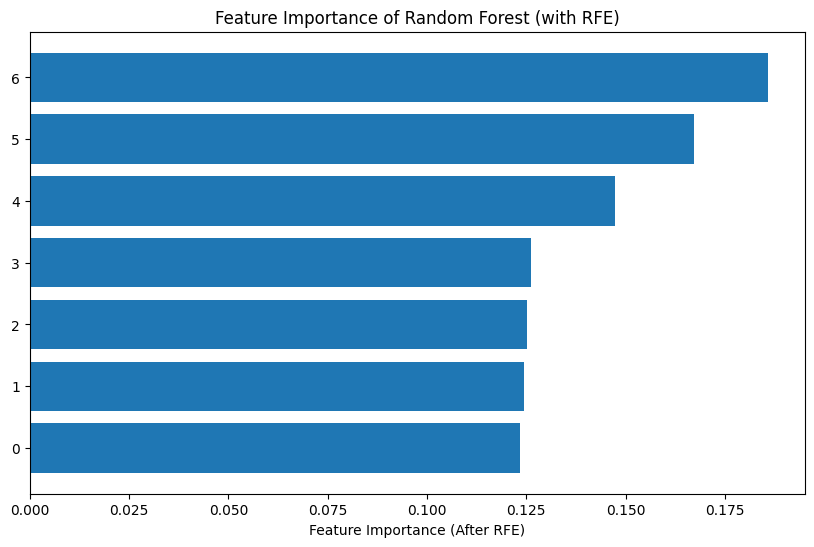


Cross Validation Scores (Train Data): [0.52884615 0.5        0.5        0.50961538 0.41346154]
Mean Cross Validation Score: 0.4903846153846153


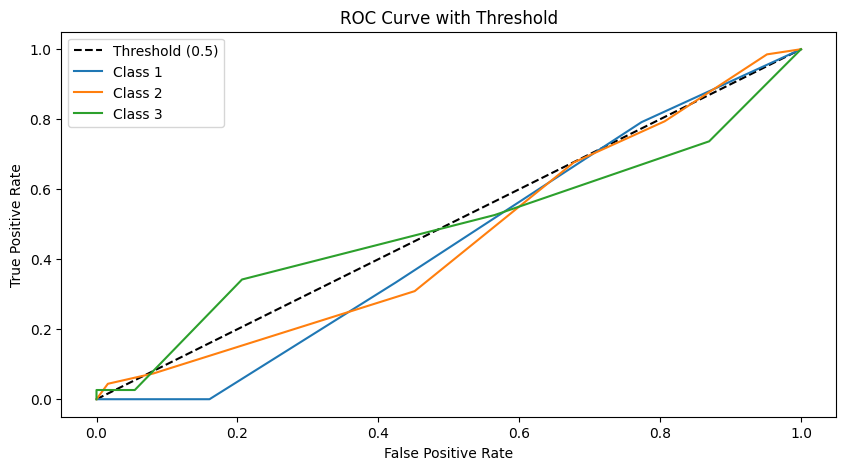

In [ ]:
#thisonerandomforest

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np



imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)


rf = RandomForestClassifier(random_state=42)
selector = RFE(rf, n_features_to_select=10, step=1)
selector.fit(X_train_imputed, y_train)


selected_features = X_train.columns[selector.support_]
print(f"Selected Features: {selected_features}")


X_train_selected = X_train_imputed[:, selector.support_]
X_test_selected = X_test_imputed[:, selector.support_]


X_train_selected_pca = pca.fit_transform(X_train_selected)
X_test_selected_pca = pca.transform(X_test_selected)


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, random_state=42)
rand_search.fit(X_train_selected_pca, y_train)


best_rf = rand_search.best_estimator_
y_train_pred = best_rf.predict(X_train_selected_pca)
y_test_pred = best_rf.predict(X_test_selected_pca)


print("\nClassification Report (Train Data - After RFE):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Data - After RFE):")
print(classification_report(y_test, y_test_pred))


print("\nTrain Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Train Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Train F1-Score:", f1_score(y_train, y_train_pred, average='weighted'))

print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Test Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("Test F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))

perm_importance = permutation_importance(best_rf, X_test_selected_pca, y_test, n_repeats=10, random_state=42)


plt.figure(figsize=(10, 6))
plt.barh(np.arange(X_test_selected_pca.shape[1]), perm_importance.importances_mean)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Random Forest (After RFE)')
plt.show()

feature_importances = best_rf.feature_importances_
sorted_idx = feature_importances.argsort()


print("\nMost important features (After RFE):")
for idx in sorted_idx[-10:]:
    print(f"Principal Component {idx + 1}")


plt.figure(figsize=(10, 6))
plt.barh(np.arange(X_test_selected_pca.shape[1]), feature_importances[sorted_idx])
plt.xlabel('Feature Importance (After RFE)')
plt.title('Feature Importance of Random Forest (with RFE)')
plt.show()


cv_scores = cross_val_score(best_rf, X_train_selected_pca, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)

print("\nCross Validation Scores (Train Data):", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(10, 5))

# Threshold line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Threshold (0.5)')

# ROC curve for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Threshold")
plt.legend()
plt.show()


best adaboost

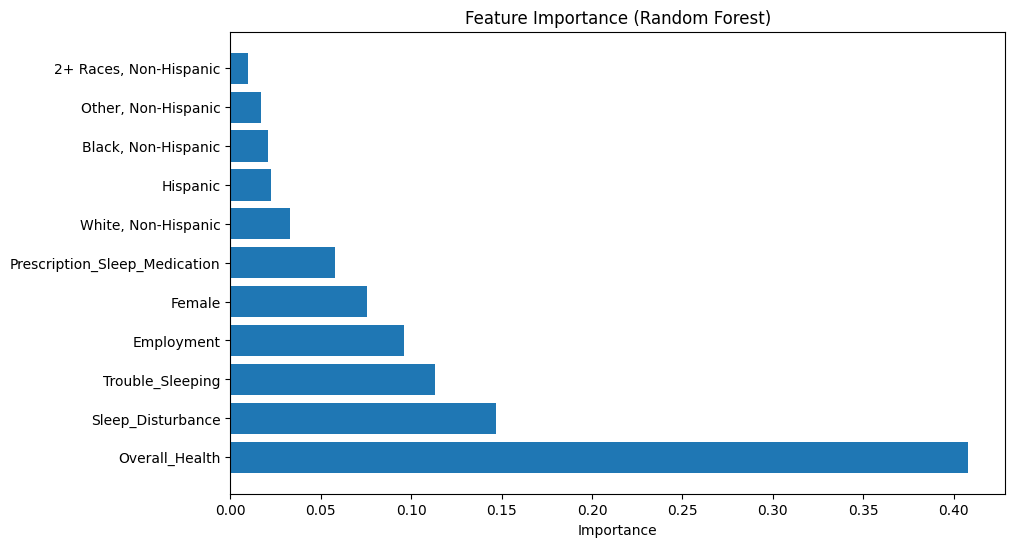

Selected Features based on RandomForest Feature Importance: Index(['Overall_Health', 'Sleep_Disturbance', 'Trouble_Sleeping', 'Employment',
       'Female', 'Prescription_Sleep_Medication', 'White, Non-Hispanic',
       'Hispanic', 'Black, Non-Hispanic', 'Other, Non-Hispanic'],
      dtype='object')


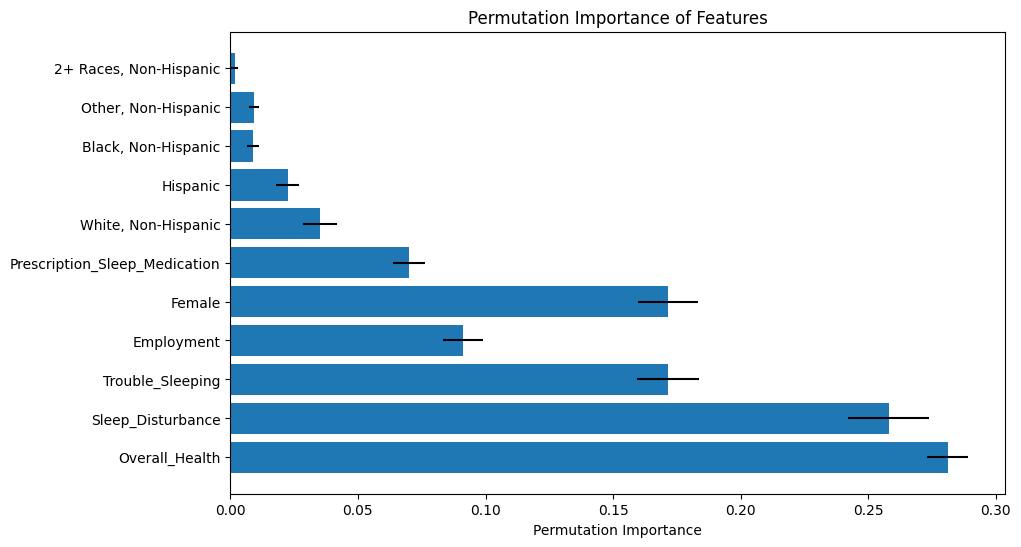

Selected Features based on Permutation Importance: Index(['Overall_Health', 'Sleep_Disturbance', 'Trouble_Sleeping', 'Employment',
       'Female', 'Prescription_Sleep_Medication', 'White, Non-Hispanic',
       'Hispanic', 'Black, Non-Hispanic', 'Other, Non-Hispanic',
       '2+ Races, Non-Hispanic'],
      dtype='object')
Final Selected Features: ['Prescription_Sleep_Medication', 'Employment', 'Trouble_Sleeping', 'White, Non-Hispanic', 'Overall_Health', 'Sleep_Disturbance', 'Hispanic', 'Other, Non-Hispanic', 'Female', 'Black, Non-Hispanic']
Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75       274
         1.0       0.64      0.71      0.67       274
         2.0       0.65      0.68      0.66       274

    accuracy                           0.69       822
   macro avg       0.70      0.69      0.70       822
weighted avg       0.70      0.69      0.70       822

Classification Report (Test Data):


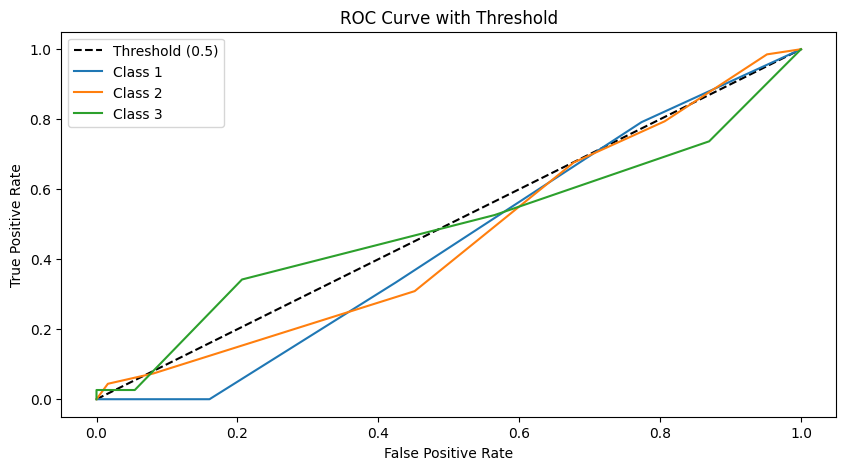

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import label_binarize

knn_imputer = KNNImputer(n_neighbors=5)
X_train_imputed = knn_imputer.fit_transform(X_train)
X_test_imputed = knn_imputer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Importance")
plt.show()


selected_features = X_train.columns[indices][:10]
print("Selected Features based on RandomForest Feature Importance:", selected_features)


results = permutation_importance(rf, X_train_smote, y_train_smote, n_repeats=10, random_state=42)

plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), results.importances_mean[indices], xerr=results.importances_std[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.show()
selected_features_perm = X_train.columns[indices][results.importances_mean[indices] > 0]
print("Selected Features based on Permutation Importance:", selected_features_perm)


selected_features_final = list(set(selected_features) & set(selected_features_perm))
print("Final Selected Features:", selected_features_final)

X_train_selected = X_train_smote[:, np.isin(X_train.columns, selected_features_final)]
X_test_selected = X_test_imputed[:, np.isin(X_train.columns, selected_features_final)]


base_estimator = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.5, 0.1],
    'estimator__max_depth': [2, 3, 5],
    'estimator__min_samples_split': [5, 10, 15, 20],
    'estimator__min_samples_leaf': [5, 10]
}

grid_search = GridSearchCV(ada_boost, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_train_selected, y_train_smote)
best_ada_boost = grid_search.best_estimator_

cv_scores = cross_val_score(best_ada_boost, X_train_selected, y_train_smote, cv=skf, scoring='accuracy')


y_train_pred = best_ada_boost.predict(X_train_selected)
y_test_pred = best_ada_boost.predict(X_test_selected)

# Replace all instances of y_train_ros with y_train_smote
print("Classification Report (Train Data):")
print(classification_report(y_train_smote, y_train_pred))

print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


print("Train Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Train Precision:", precision_score(y_train_smote, y_train_pred, average='weighted', zero_division=1))
print("Train Recall:", recall_score(y_train_smote, y_train_pred, average='weighted', zero_division=1))
print("Train F1-Score:", f1_score(y_train_smote, y_train_pred, average='weighted'))


print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, average='weighted', zero_division=1))
print("Test Recall:", recall_score(y_test, y_test_pred, average='weighted', zero_division=1))
print("Test F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(10, 5))

# Threshold line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Threshold (0.5)')

# ROC curve for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Threshold")
plt.legend()
plt.show()


# **Compare**